<a href="https://colab.research.google.com/github/aadarshsenapati/machine-learning/blob/main/lab3_AP23110010458.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [14]:
import pandas as pd
df = pd.read_csv("/content/DMV_Written_Tests.csv")

In [16]:
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

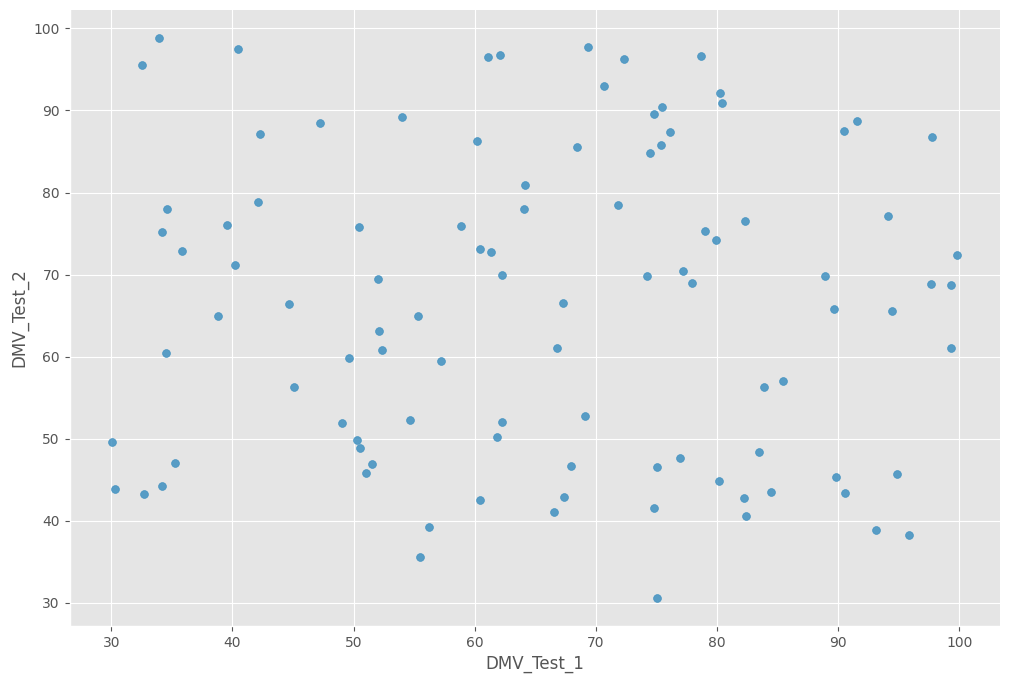

In [18]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='DMV_Test_1', y='DMV_Test_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
sigmoid(34.623660)

np.float64(0.9999999999999991)

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [69]:
import math
def cost_function(theta, x, y):
    m=len(y)
    h=sigmoid(np.dot(x,theta))
    h = np.clip(h, 1e-15, 1 - 1e-15)
    cost=(-1/m)
    k=0
    for i in range(m):
      k+=((y[i])*math.log(h[i]))+((1-(y[i]))*math.log(1-(h[i])))
    cost*=k
    return cost


def gradient(x,y,theta):
  m=len(y)
  h=sigmoid(np.dot(x,theta))
  gradient_vector = np.dot(x.T, (h - y)) / m
  return gradient_vector

### Task 6: Cost and Gradient at Initialization
---

In [70]:
x = df[['DMV_Test_1', 'DMV_Test_2']].values
y = df['Results'].values
x = np.insert(x, 0, 1, axis=1)
theta = np.zeros(x.shape[1])

In [71]:
print(x)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

In [72]:
print(y)

[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


In [73]:
print(theta)

[0. 0. 0.]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [74]:
def gradient_descent(x, y, theta, alpha, num_iters):
  m=len(y)
  cost_log=np.zeros(num_iters)
  i=0
  while(num_iters):
    cost_log[i]=cost_function(x, y, theta)
    theta-= alpha*gradient(x,y,theta)
    i+=1
    num_iters-=1
  return theta,cost_log

In [124]:
x = np.c_[np.ones(df.shape[0]), df[['DMV_Test_1', 'DMV_Test_2']].values]
y = df['Results'].values

theta = np.zeros(x.shape[1])

ir=0.001
i=100000
ot,jhis=gradient_descent(x,y,theta,ir,i)
print(ot)
print(jhis)

[-4.81180027  0.04528064  0.03819149]
[34.53957599 34.27048899 34.50201024 ... 88.97658926 88.97696806
 88.97734686]


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

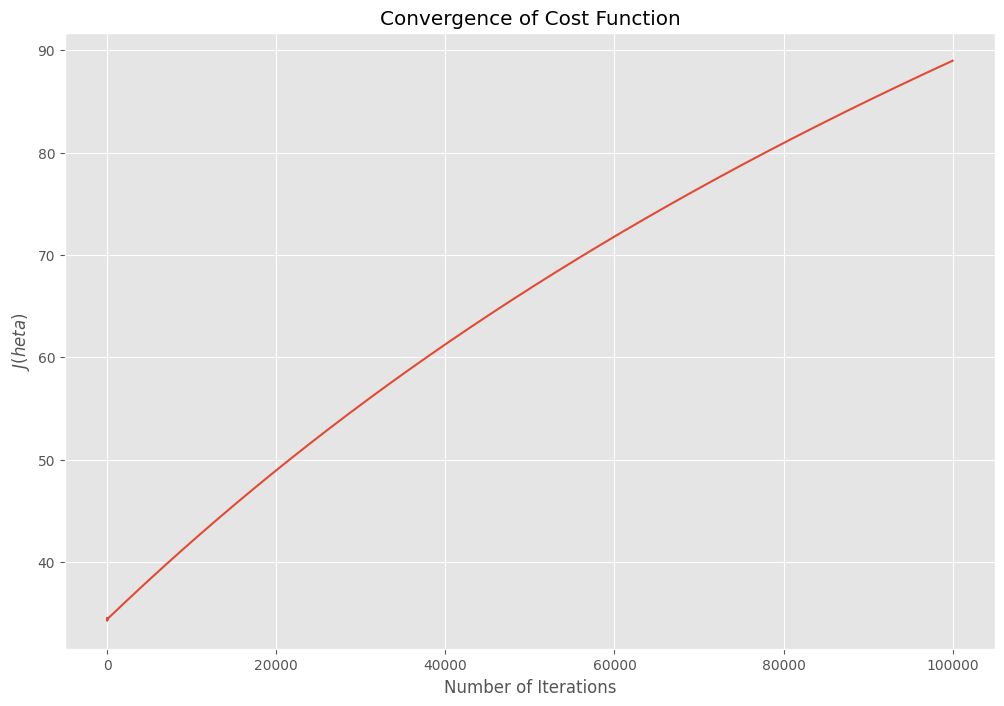

In [125]:
plt.plot(jhis)
plt.xlabel("Number of Iterations")
plt.ylabel("$J(\theta)$")
plt.title("Convergence of Cost Function")
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

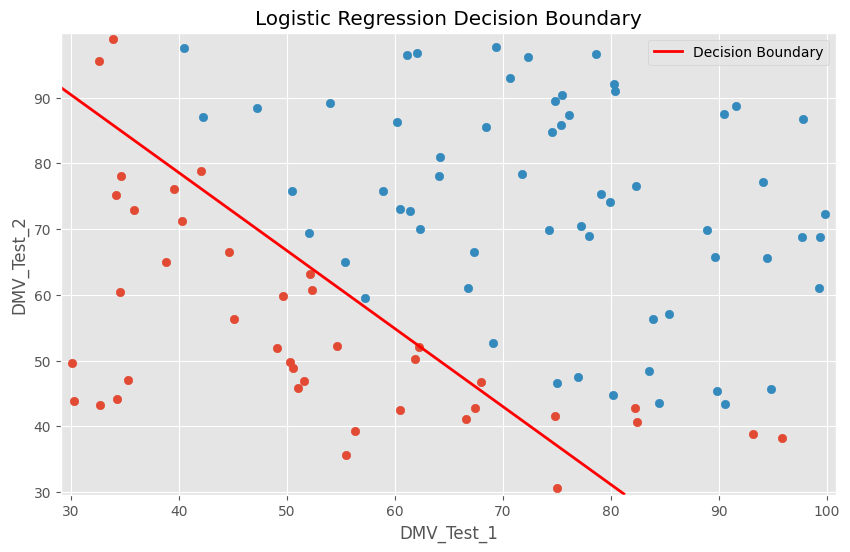

In [128]:
plt.figure(figsize=(10, 6))

# Scatter the two classes
plt.scatter(x[y == 0, 1], x[y == 0, 2], label='Not Admitted')
plt.scatter(x[y == 1, 1], x[y == 1, 2], label='Admitted')

# Build a dense grid over the feature space
x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1
x2_min, x2_max = x[:, 2].min() - 1, x[:, 2].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x1_min, x1_max, 300),
    np.linspace(x2_min, x2_max, 300)
)

# Evaluate z = θᵀx over the grid (decision boundary = 0)
grid = np.c_[np.ones(xx.size), xx.ravel(), yy.ravel()]
zz = grid @ ot
zz = zz.reshape(xx.shape)

contour = plt.contour(xx, yy, zz, levels=[0], linewidths=2, colors='red')

line_proxy = plt.Line2D([], [], color='red', linewidth=2, label='Decision Boundary')

plt.xlabel('DMV_Test_1')
plt.ylabel('DMV_Test_2')
plt.title('Logistic Regression Decision Boundary')
plt.legend(handles=[line_proxy])
plt.grid(True)
plt.show()


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [132]:
def predict(theta, x):
    probability = sigmoid(x @ theta)
    return (probability >= 0.5).astype(int)

In [133]:
predictions = predict(ot, x)
accuracy = np.mean(predictions == y) * 100
print(f"Accuracy on the training data: {accuracy:.2f}%")

Accuracy on the training data: 91.00%


In [134]:
new_student_scores = np.array([1, 45, 85])
predicted_class = predict(ot, new_student_scores)

if predicted_class == 1:
    print("\nPredicted: Admitted")
else:
    print("\nPredicted: Not Admitted")


Predicted: Admitted
